# Complete Guide to Seaborn Statistical Visualization

<!--
Author: Molla Samser
Website: https://rskworld.in/
Email: help@rskworld.in
Phone: +91 93305 39277
Address: Nutanhat, Mongolkote, Purba Burdwan, West Bengal, India, 713147
-->

This comprehensive notebook demonstrates all types of statistical visualizations with Seaborn, covering:

1. **Distribution Plots**: Histograms, KDE plots, rug plots
2. **Correlation Analysis**: Heatmaps, cluster maps
3. **Categorical Plots**: Bar plots, box plots, violin plots, swarm plots
4. **Regression Visualization**: Linear, polynomial, robust regression
5. **Advanced Visualizations**: Pair plots, joint plots, facet grids

Perfect for exploratory data analysis and statistical insights.


In [1]:
# Author: Molla Samser
# Website: https://rskworld.in/
# Email: help@rskworld.in
# Phone: +91 93305 39277
# Address: Nutanhat, Mongolkote, Purba Burdwan, West Bengal, India, 713147

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Set style and configuration
sns.set_style("whitegrid")
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

# Load data
df = pd.read_csv('../data/sample_data.csv')
print("=" * 60)
print("SEABORN STATISTICAL VISUALIZATION - COMPLETE GUIDE")
print("=" * 60)
print(f"\nDataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())


SEABORN STATISTICAL VISUALIZATION - COMPLETE GUIDE

Dataset shape: (30, 9)

Columns: ['age', 'income', 'education_years', 'experience', 'gender', 'category', 'score', 'sales', 'region']

First few rows:
   age  income  education_years  experience  gender    category  score  sales  \
0   25   45000               12           2    Male  Category A     75   1200   
1   30   55000               14           5  Female  Category B     82   1500   
2   35   65000               16           8    Male  Category A     88   1800   
3   28   48000               13           3  Female  Category C     70   1100   
4   32   60000               15           6    Male  Category B     85   1700   

  region  
0  North  
1  South  
2   East  
3   West  
4  North  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              30 non-null    

## Part 1: Distribution Plots


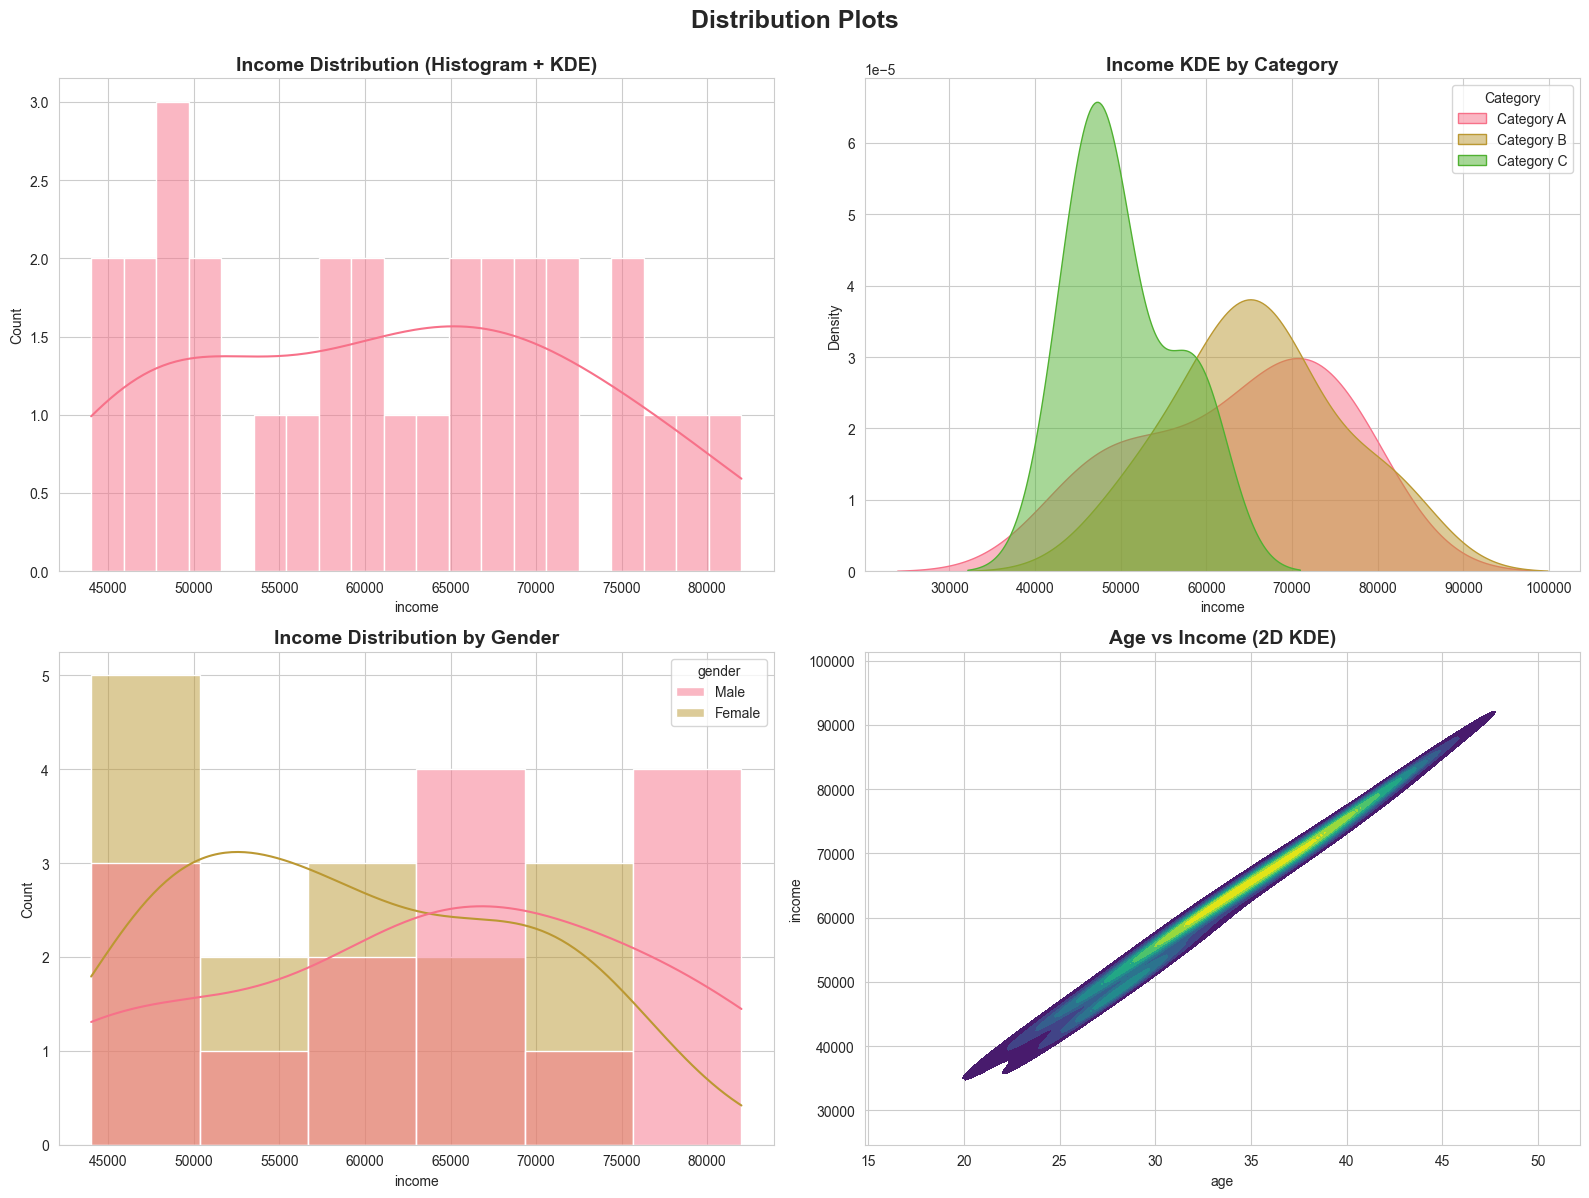

In [2]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Distribution plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Histogram with KDE
sns.histplot(data=df, x='income', bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Income Distribution (Histogram + KDE)', fontsize=14, fontweight='bold')

# KDE plot by category
for category in df['category'].unique():
    sns.kdeplot(data=df[df['category'] == category], x='income', 
                label=category, fill=True, alpha=0.5, ax=axes[0, 1])
axes[0, 1].set_title('Income KDE by Category', fontsize=14, fontweight='bold')
axes[0, 1].legend(title='Category')

# Histogram by gender
sns.histplot(data=df, x='income', hue='gender', kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Income Distribution by Gender', fontsize=14, fontweight='bold')

# 2D KDE plot
sns.kdeplot(data=df, x='age', y='income', fill=True, cmap='viridis', ax=axes[1, 1])
axes[1, 1].set_title('Age vs Income (2D KDE)', fontsize=14, fontweight='bold')

plt.suptitle('Distribution Plots', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('../images/complete_distribution.png', dpi=300, bbox_inches='tight')
plt.show()


## Part 2: Correlation Analysis


C:\Users\samse\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\matrix.py:1124: UserWarning: ``square=True`` ignored in clustermap
  warnings.warn(msg)


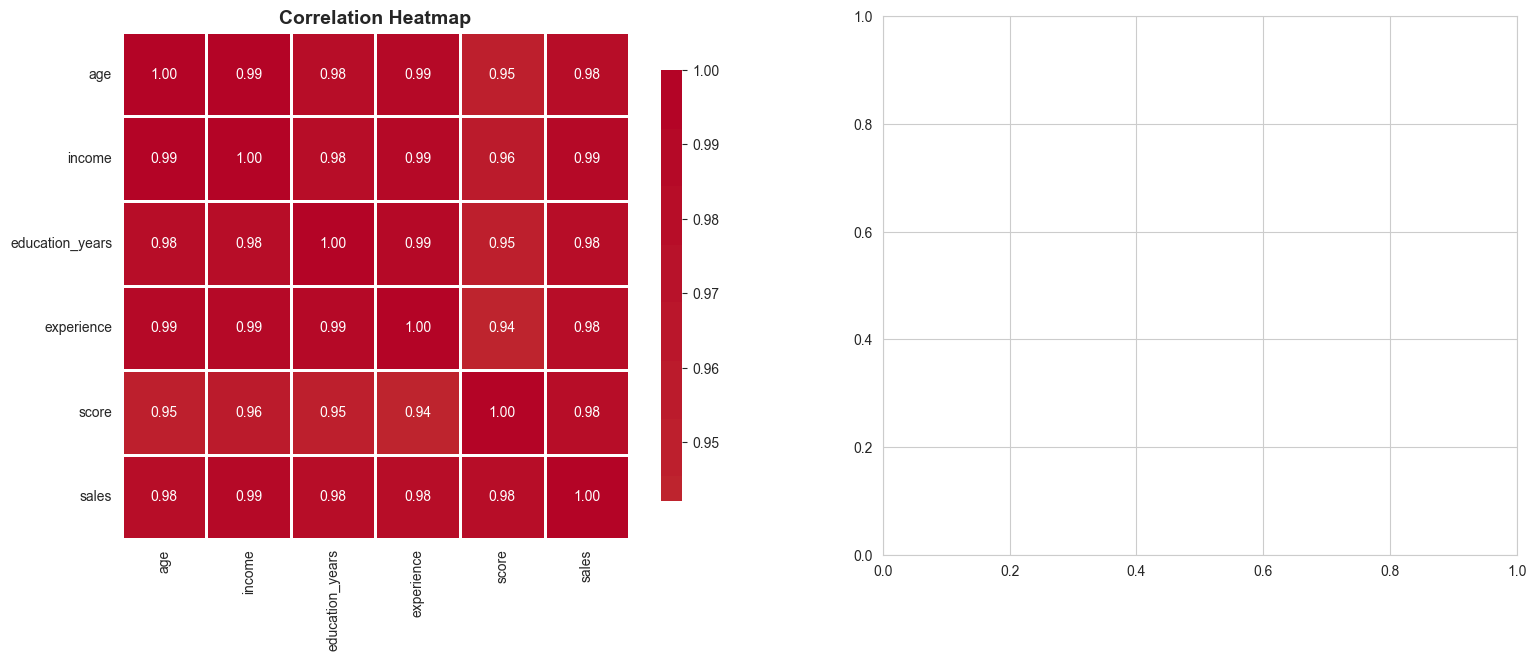

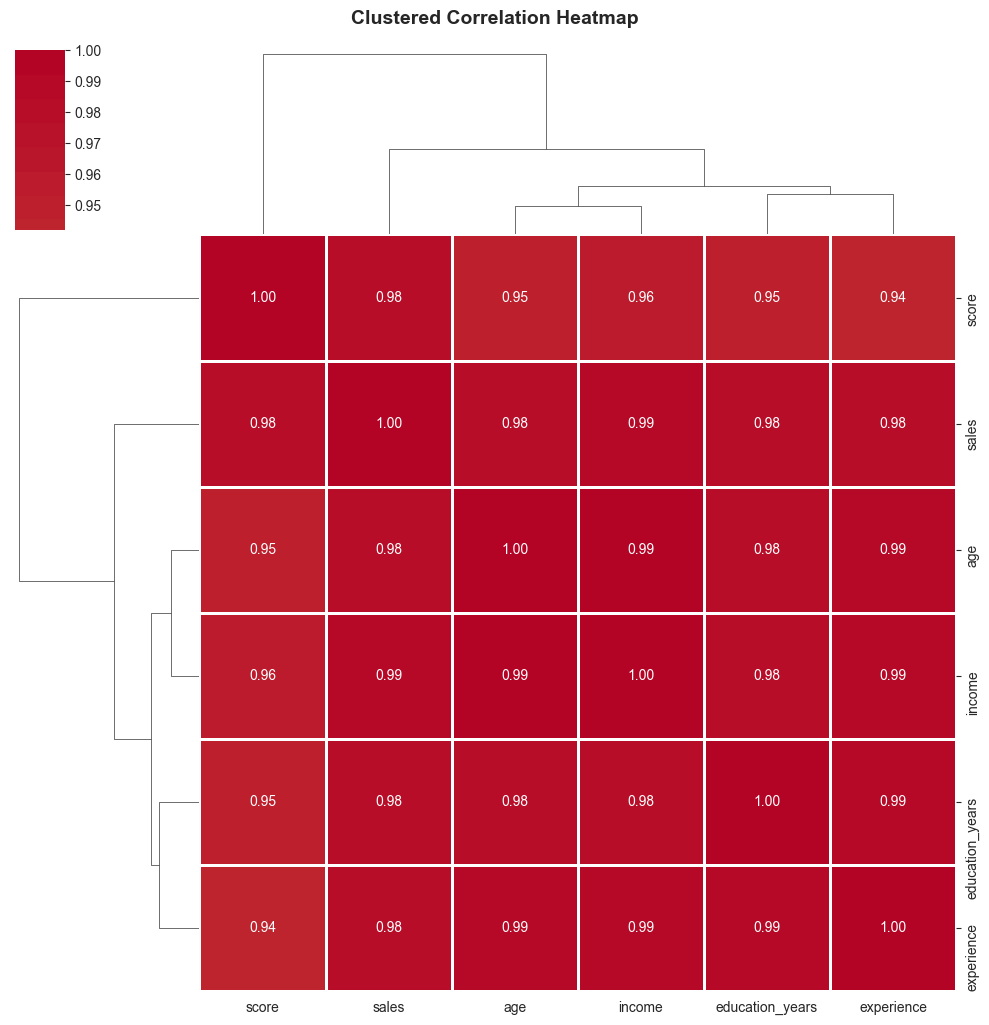

In [3]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Correlation analysis
numeric_cols = ['age', 'income', 'education_years', 'experience', 'score', 'sales']
corr_matrix = df[numeric_cols].corr()

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Basic heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[0])
axes[0].set_title('Correlation Heatmap', fontsize=14, fontweight='bold')

# Clustered heatmap
g = sns.clustermap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
                   figsize=(10, 10), center=0, square=True, linewidths=1)
g.fig.suptitle('Clustered Correlation Heatmap', fontsize=14, fontweight='bold', y=1.02)
plt.savefig('../images/complete_correlation.png', dpi=300, bbox_inches='tight')
plt.show()


## Part 3: Categorical Plots


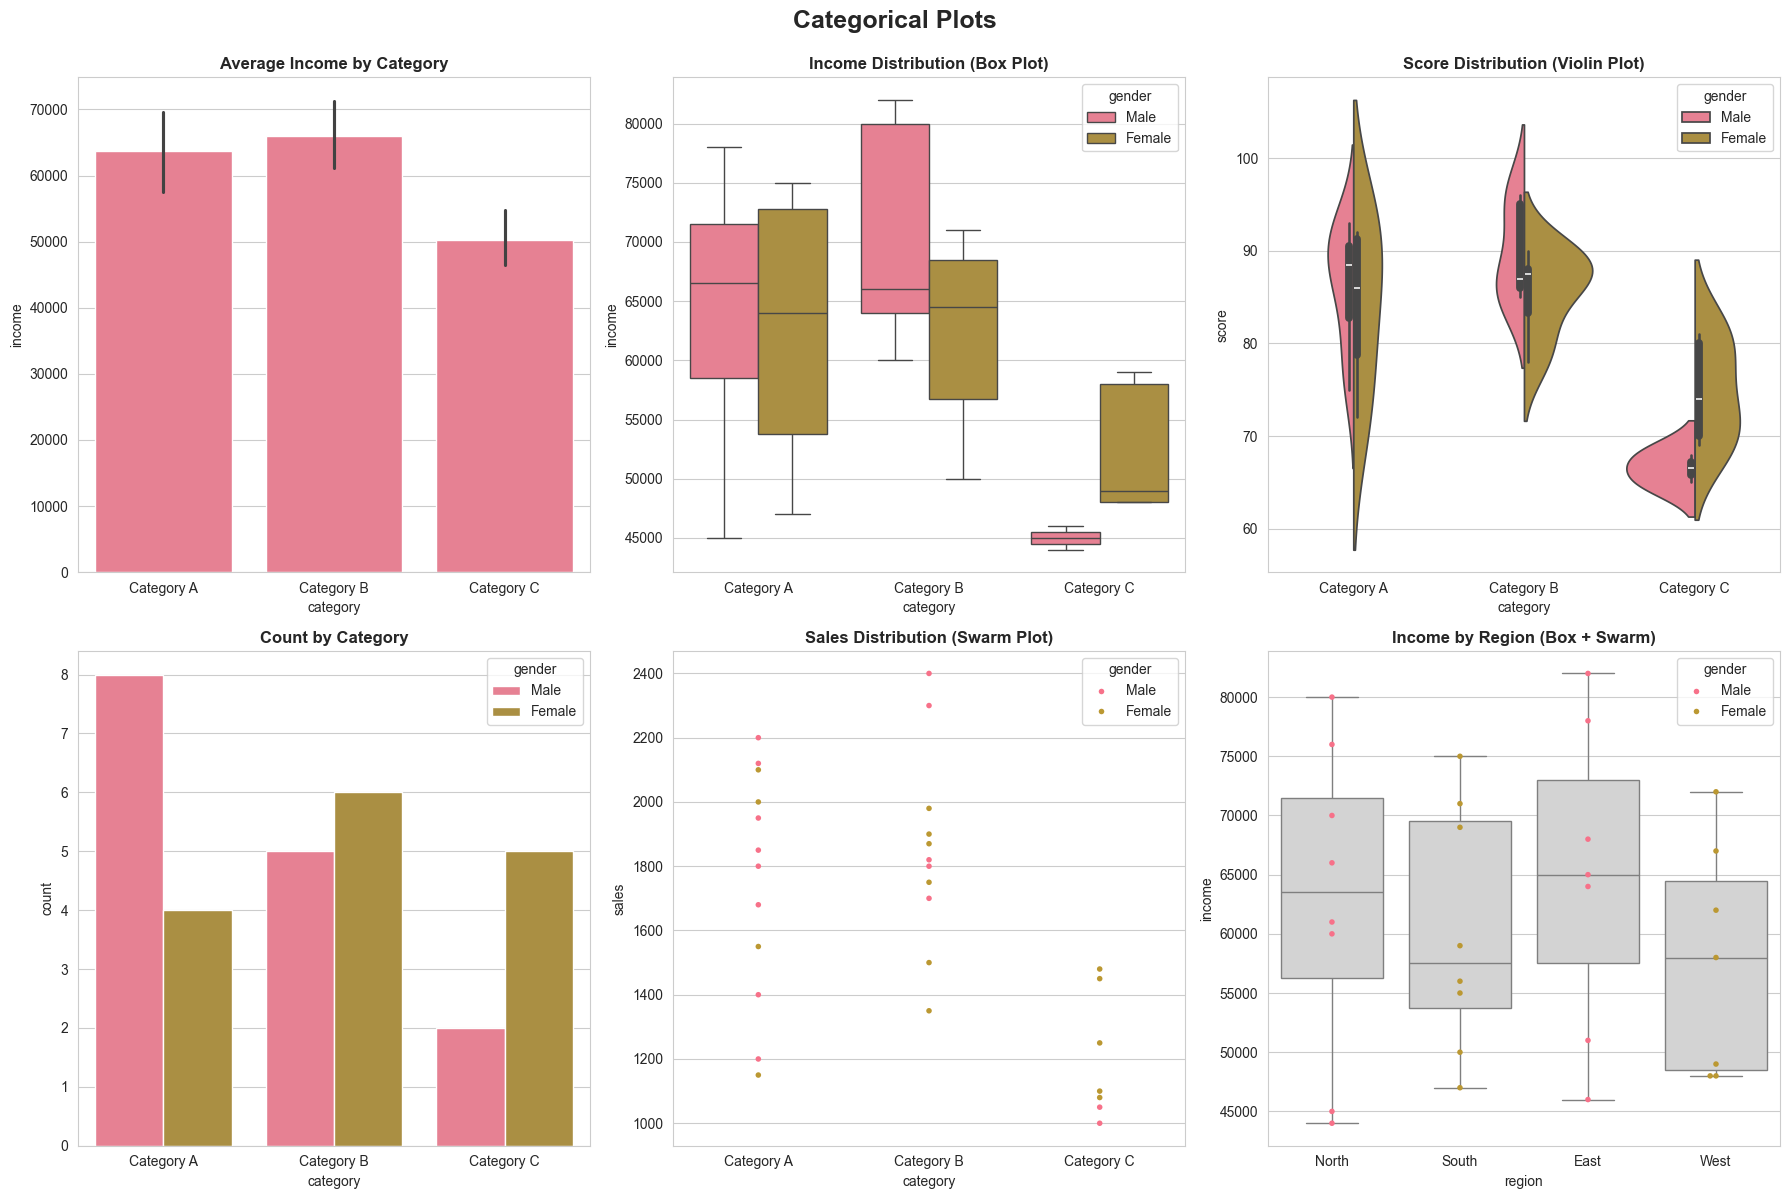

In [4]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Categorical plots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Bar plot
sns.barplot(data=df, x='category', y='income', estimator='mean', ax=axes[0, 0])
axes[0, 0].set_title('Average Income by Category', fontsize=12, fontweight='bold')

# Box plot
sns.boxplot(data=df, x='category', y='income', hue='gender', ax=axes[0, 1])
axes[0, 1].set_title('Income Distribution (Box Plot)', fontsize=12, fontweight='bold')

# Violin plot
sns.violinplot(data=df, x='category', y='score', hue='gender', split=True, ax=axes[0, 2])
axes[0, 2].set_title('Score Distribution (Violin Plot)', fontsize=12, fontweight='bold')

# Count plot
sns.countplot(data=df, x='category', hue='gender', ax=axes[1, 0])
axes[1, 0].set_title('Count by Category', fontsize=12, fontweight='bold')

# Swarm plot
sns.swarmplot(data=df, x='category', y='sales', hue='gender', size=4, ax=axes[1, 1])
axes[1, 1].set_title('Sales Distribution (Swarm Plot)', fontsize=12, fontweight='bold')

# Combined box and swarm
sns.boxplot(data=df, x='region', y='income', color='lightgray', ax=axes[1, 2])
sns.swarmplot(data=df, x='region', y='income', hue='gender', size=4, ax=axes[1, 2])
axes[1, 2].set_title('Income by Region (Box + Swarm)', fontsize=12, fontweight='bold')

plt.suptitle('Categorical Plots', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('../images/complete_categorical.png', dpi=300, bbox_inches='tight')
plt.show()


## Part 4: Regression Visualization


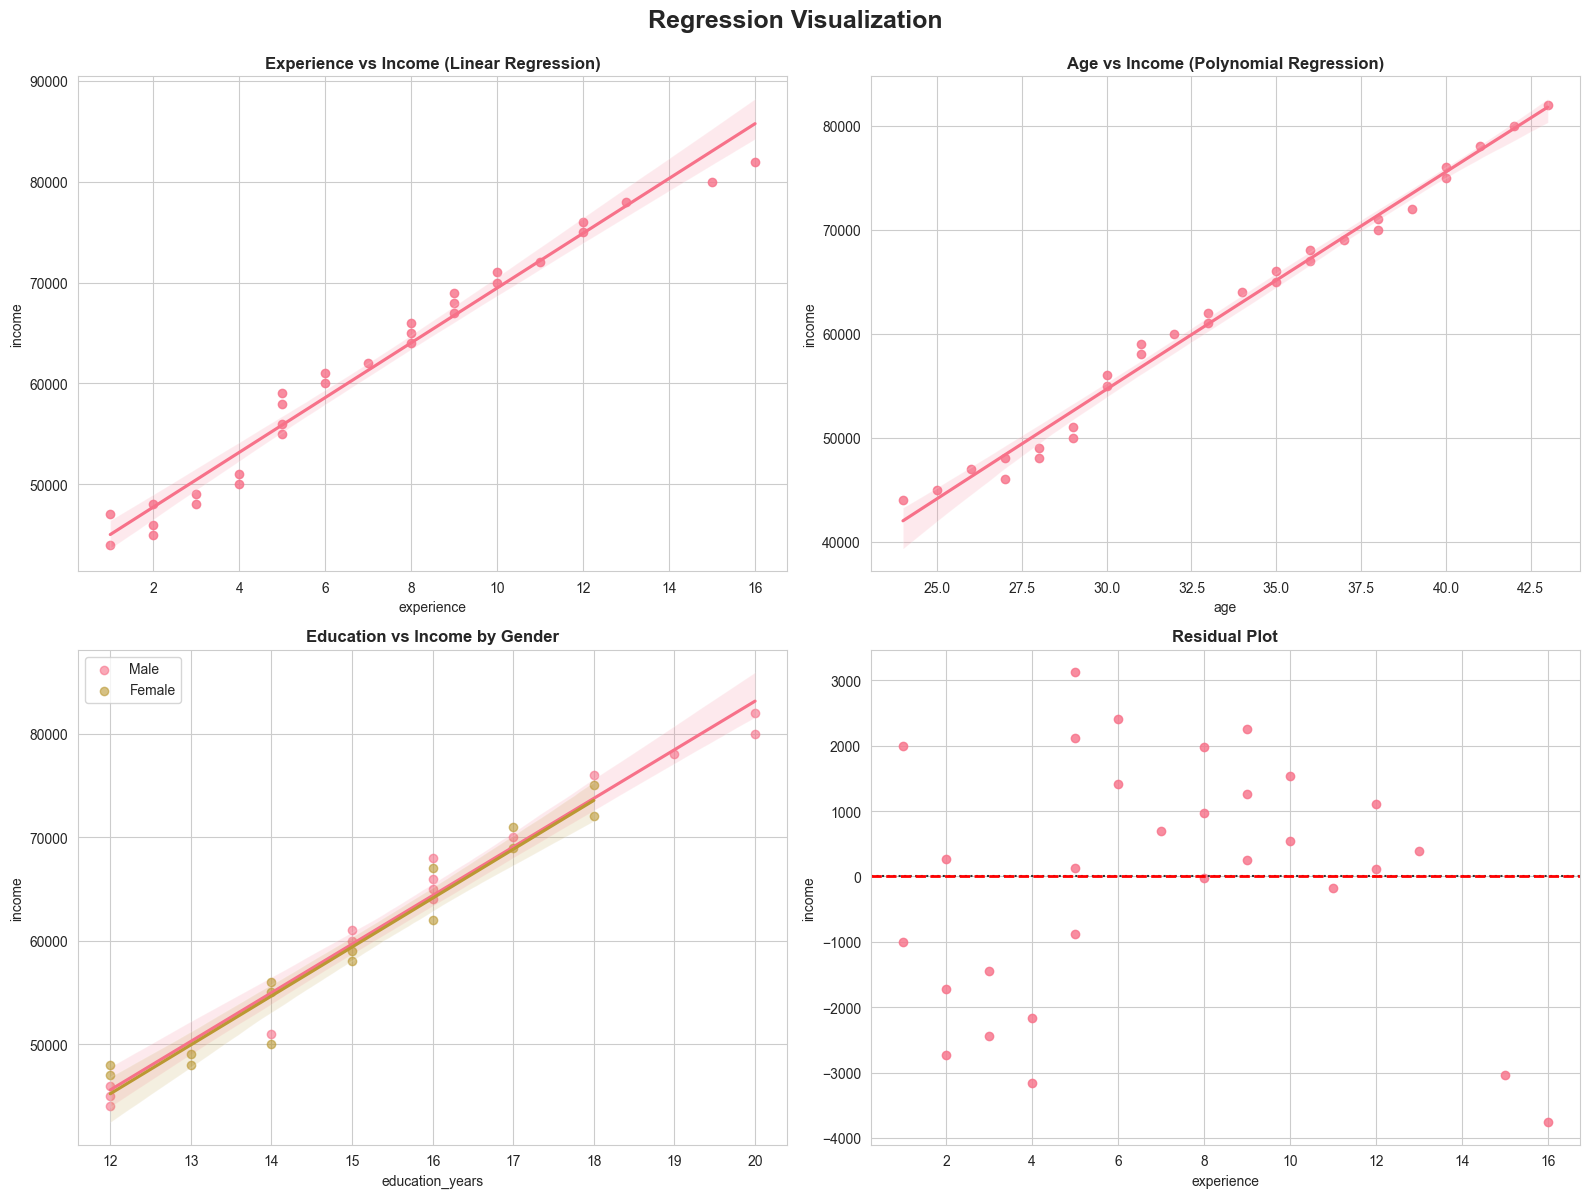

In [5]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Regression plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Linear regression
sns.regplot(data=df, x='experience', y='income', scatter=True, ci=95, ax=axes[0, 0])
axes[0, 0].set_title('Experience vs Income (Linear Regression)', fontsize=12, fontweight='bold')

# Polynomial regression
sns.regplot(data=df, x='age', y='income', order=2, scatter=True, ci=95, ax=axes[0, 1])
axes[0, 1].set_title('Age vs Income (Polynomial Regression)', fontsize=12, fontweight='bold')

# Regression with hue (using regplot with multiple calls)
sns.regplot(data=df[df['gender']=='Male'], x='education_years', y='income', 
            scatter=True, ci=95, label='Male', ax=axes[1, 0], scatter_kws={'alpha': 0.6})
sns.regplot(data=df[df['gender']=='Female'], x='education_years', y='income', 
            scatter=True, ci=95, label='Female', ax=axes[1, 0], scatter_kws={'alpha': 0.6})
axes[1, 0].set_title('Education vs Income by Gender', fontsize=12, fontweight='bold')
axes[1, 0].legend()

# Residual plot
sns.residplot(data=df, x='experience', y='income', ax=axes[1, 1])
axes[1, 1].axhline(y=0, color='r', linestyle='--', linewidth=2)
axes[1, 1].set_title('Residual Plot', fontsize=12, fontweight='bold')

plt.suptitle('Regression Visualization', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('../images/complete_regression.png', dpi=300, bbox_inches='tight')
plt.show()


## Part 5: Advanced Visualizations


Generating Pair Plot...


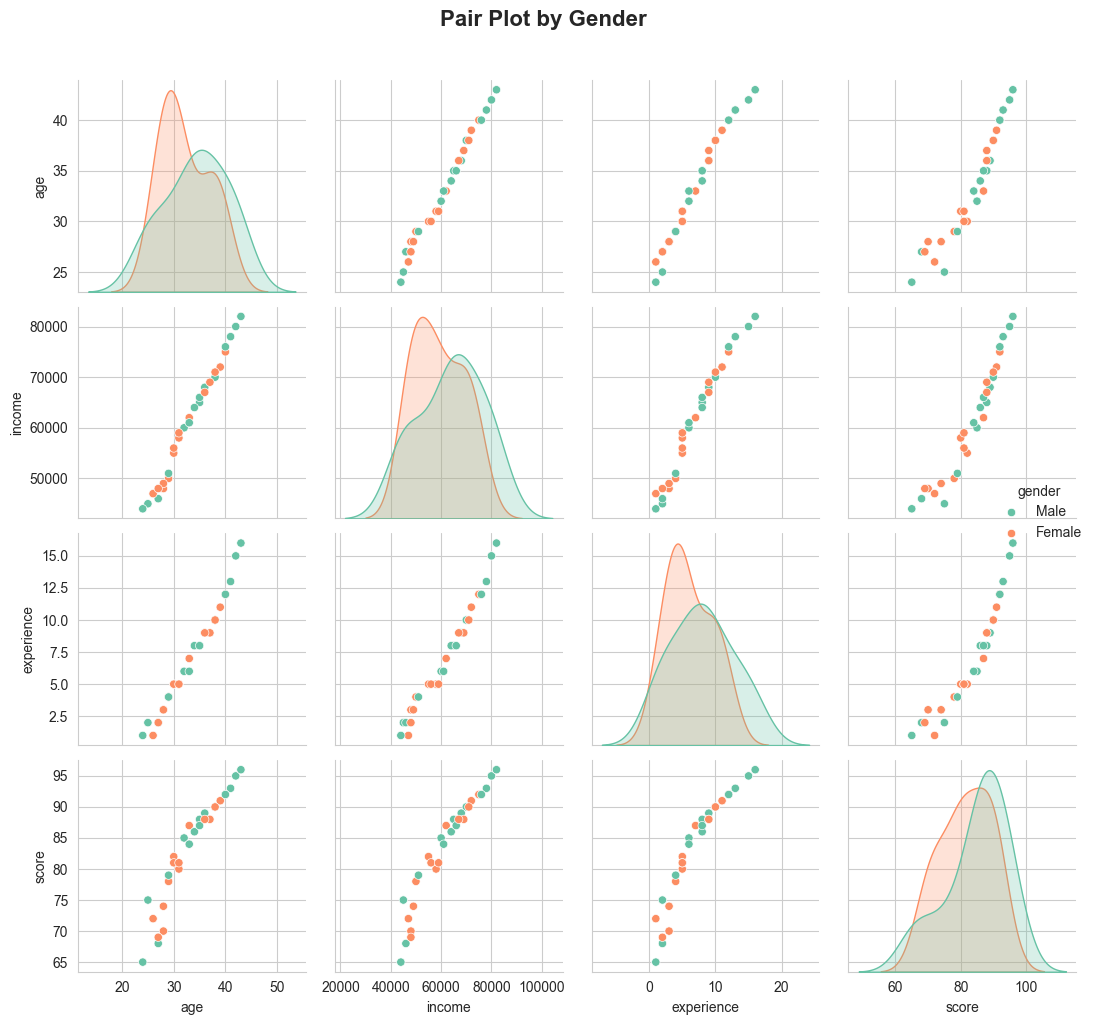

In [6]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Pair plot
print("Generating Pair Plot...")
g = sns.pairplot(df, vars=['age', 'income', 'experience', 'score'], 
                 hue='gender', diag_kind='kde', height=2.5, palette='Set2')
g.fig.suptitle('Pair Plot by Gender', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../images/complete_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()


Generating Joint Plot...


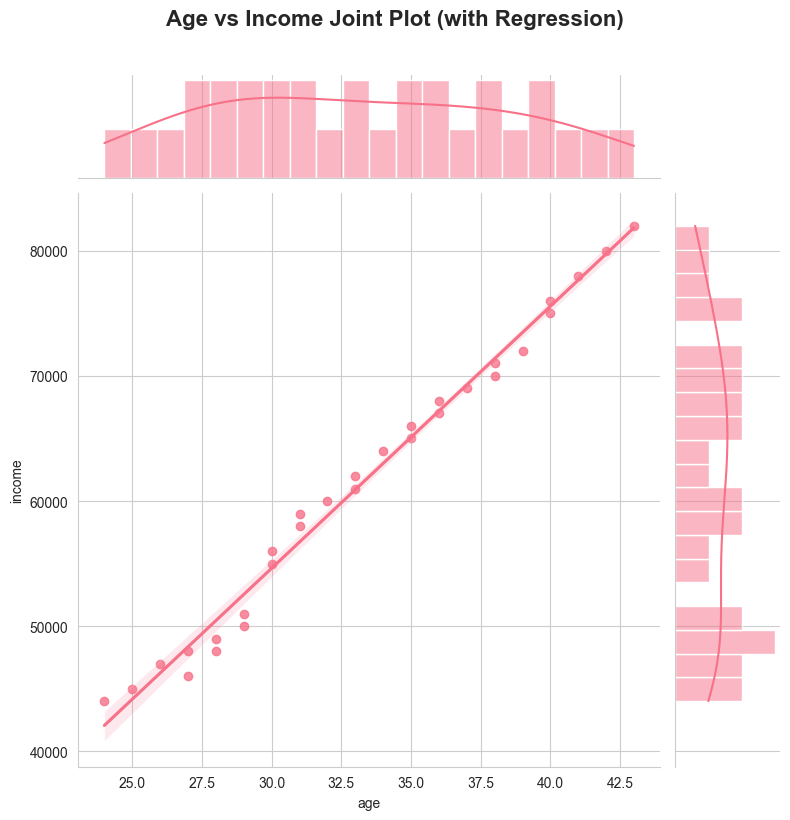

In [7]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Joint plot
print("Generating Joint Plot...")
g = sns.jointplot(data=df, x='age', y='income', kind='reg', 
                  marginal_kws=dict(bins=20, fill=True), height=8)
g.fig.suptitle('Age vs Income Joint Plot (with Regression)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('../images/complete_jointplot.png', dpi=300, bbox_inches='tight')
plt.show()


## Part 6: Comprehensive Dashboard


Generating Comprehensive Dashboard...


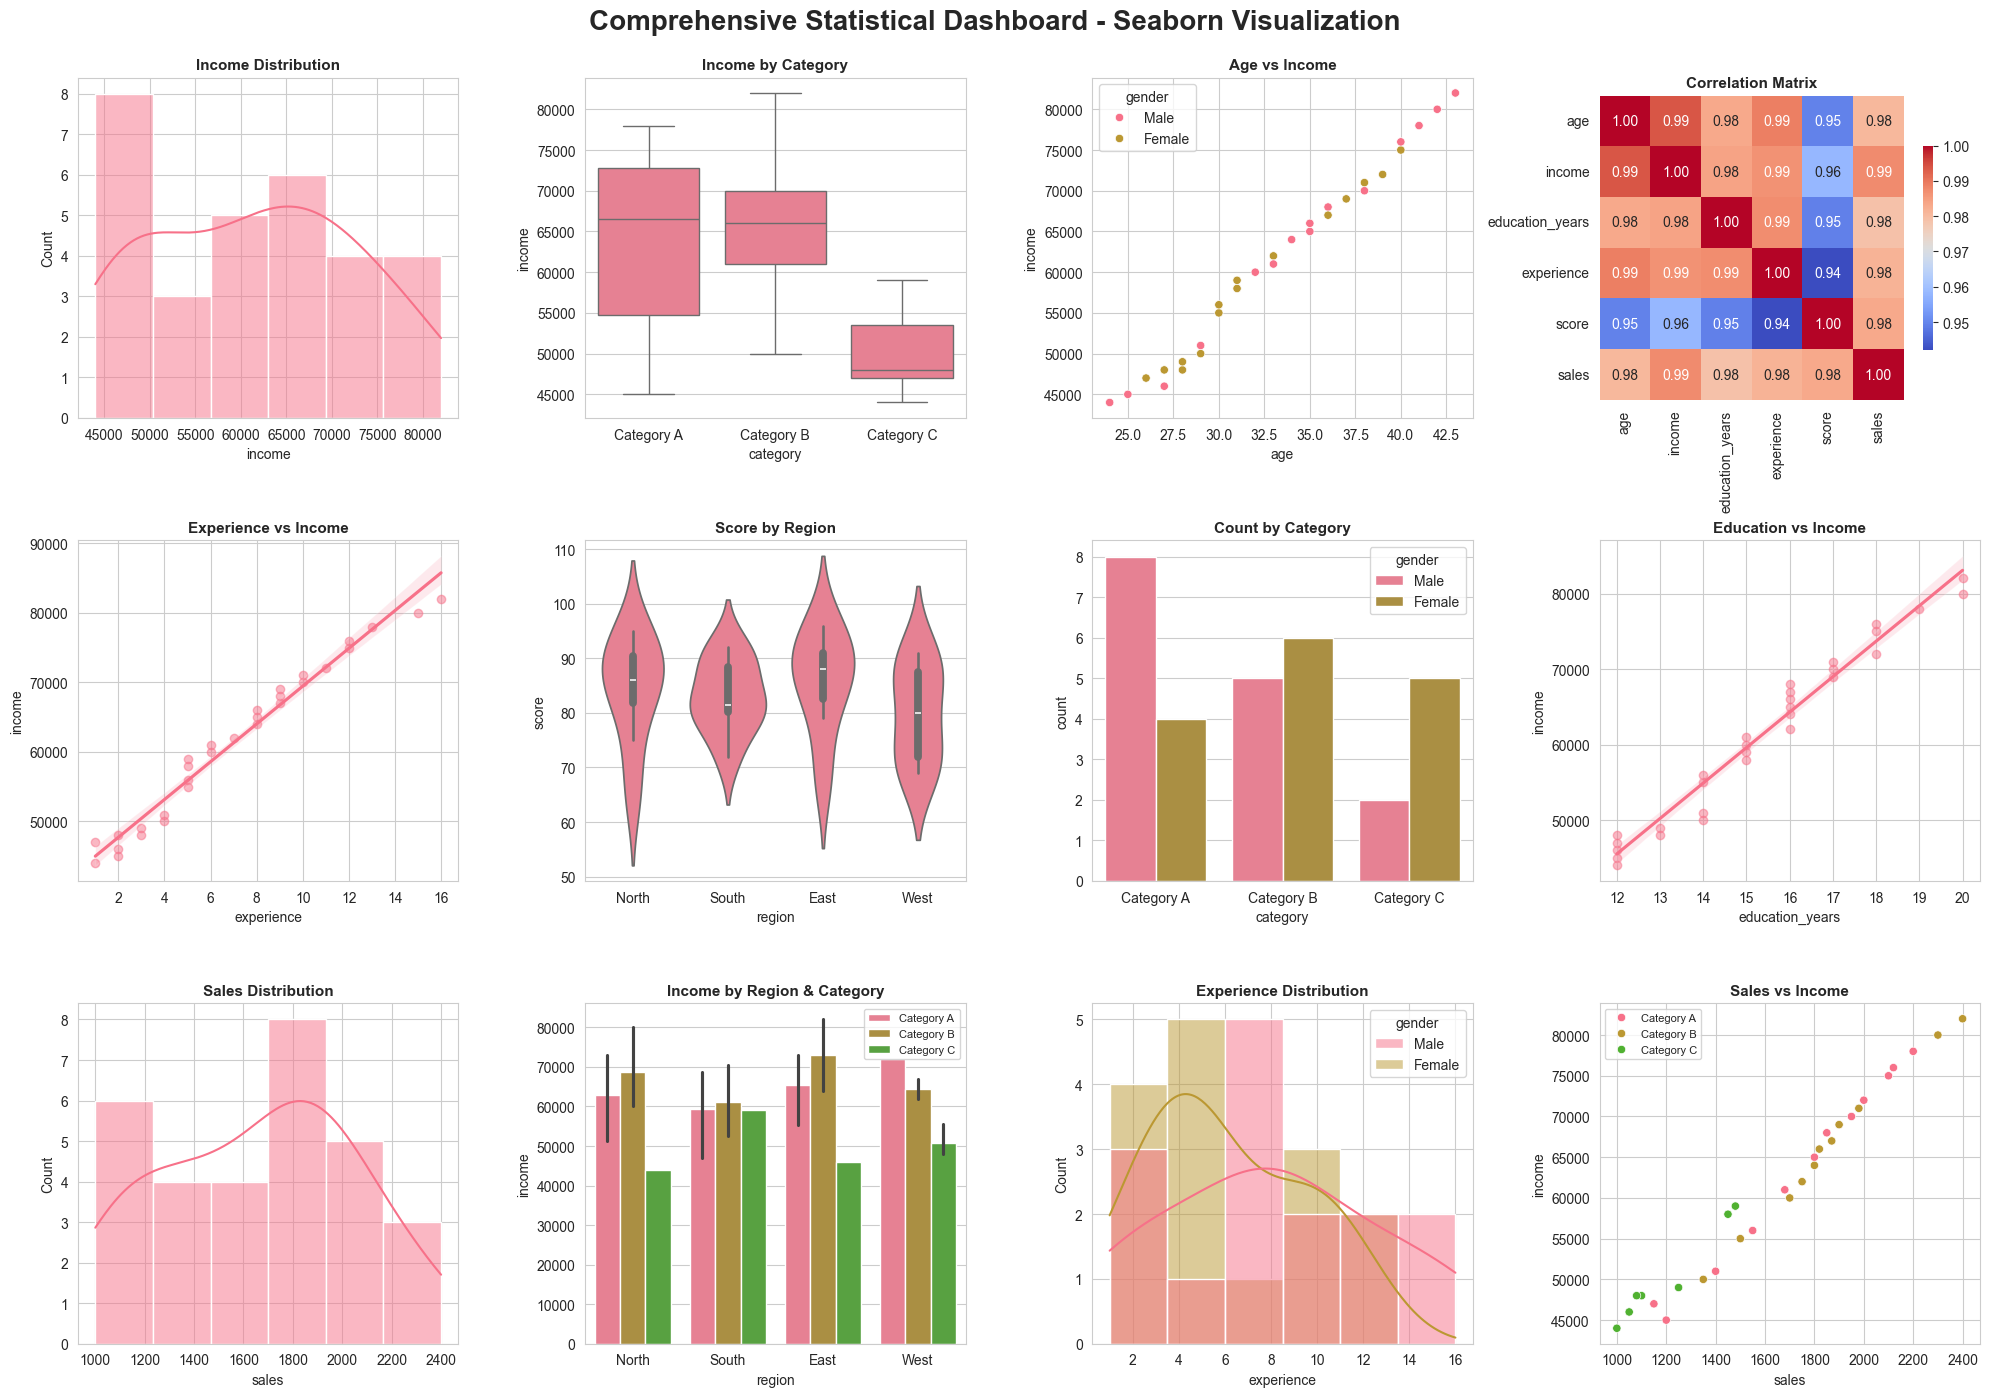


VISUALIZATION COMPLETE!

All visualizations have been generated and saved to the images/ directory.

For more detailed examples, check the individual notebooks:
  - 01_distribution_plots.ipynb
  - 02_correlation_heatmaps.ipynb
  - 03_categorical_plots.ipynb
  - 04_regression_plots.ipynb
  - 05_advanced_visualizations.ipynb



In [8]:
# Author: Molla Samser
# Website: https://rskworld.in/

# Create comprehensive dashboard
print("Generating Comprehensive Dashboard...")
fig = plt.figure(figsize=(20, 14))

# Panel 1: Income distribution
ax1 = plt.subplot(3, 4, 1)
sns.histplot(data=df, x='income', kde=True, ax=ax1)
ax1.set_title('Income Distribution', fontsize=11, fontweight='bold')

# Panel 2: Income by category
ax2 = plt.subplot(3, 4, 2)
sns.boxplot(data=df, x='category', y='income', ax=ax2)
ax2.set_title('Income by Category', fontsize=11, fontweight='bold')

# Panel 3: Age vs Income scatter
ax3 = plt.subplot(3, 4, 3)
sns.scatterplot(data=df, x='age', y='income', hue='gender', ax=ax3)
ax3.set_title('Age vs Income', fontsize=11, fontweight='bold')

# Panel 4: Correlation heatmap (small)
ax4 = plt.subplot(3, 4, 4)
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, cbar_kws={"shrink": 0.6}, ax=ax4)
ax4.set_title('Correlation Matrix', fontsize=11, fontweight='bold')

# Panel 5: Experience vs Income regression
ax5 = plt.subplot(3, 4, 5)
sns.regplot(data=df, x='experience', y='income', scatter_kws={'alpha': 0.5}, ax=ax5)
ax5.set_title('Experience vs Income', fontsize=11, fontweight='bold')

# Panel 6: Score by region
ax6 = plt.subplot(3, 4, 6)
sns.violinplot(data=df, x='region', y='score', ax=ax6)
ax6.set_title('Score by Region', fontsize=11, fontweight='bold')

# Panel 7: Count by category
ax7 = plt.subplot(3, 4, 7)
sns.countplot(data=df, x='category', hue='gender', ax=ax7)
ax7.set_title('Count by Category', fontsize=11, fontweight='bold')

# Panel 8: Education vs Income
ax8 = plt.subplot(3, 4, 8)
sns.regplot(data=df, x='education_years', y='income', robust=True, 
            scatter_kws={'alpha': 0.5}, ax=ax8)
ax8.set_title('Education vs Income', fontsize=11, fontweight='bold')

# Panel 9: Sales distribution
ax9 = plt.subplot(3, 4, 9)
sns.histplot(data=df, x='sales', kde=True, ax=ax9)
ax9.set_title('Sales Distribution', fontsize=11, fontweight='bold')

# Panel 10: Income by region and category
ax10 = plt.subplot(3, 4, 10)
sns.barplot(data=df, x='region', y='income', hue='category', ax=ax10)
ax10.set_title('Income by Region & Category', fontsize=11, fontweight='bold')
ax10.legend(fontsize=8)

# Panel 11: Experience distribution
ax11 = plt.subplot(3, 4, 11)
sns.histplot(data=df, x='experience', hue='gender', kde=True, ax=ax11)
ax11.set_title('Experience Distribution', fontsize=11, fontweight='bold')

# Panel 12: Sales vs Income
ax12 = plt.subplot(3, 4, 12)
sns.scatterplot(data=df, x='sales', y='income', hue='category', ax=ax12)
ax12.set_title('Sales vs Income', fontsize=11, fontweight='bold')
ax12.legend(fontsize=8)

plt.suptitle('Comprehensive Statistical Dashboard - Seaborn Visualization', 
             fontsize=20, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('../images/complete_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 60)
print("VISUALIZATION COMPLETE!")
print("=" * 60)
print("\nAll visualizations have been generated and saved to the images/ directory.")
print("\nFor more detailed examples, check the individual notebooks:")
print("  - 01_distribution_plots.ipynb")
print("  - 02_correlation_heatmaps.ipynb")
print("  - 03_categorical_plots.ipynb")
print("  - 04_regression_plots.ipynb")
print("  - 05_advanced_visualizations.ipynb")
print("\n" + "=" * 60)
